# 18.085 Problem Set 2

Due Friday **March 3** at 1pm.

## Problem 1

**(a)** The eigenvalues of a real *anti-Hermitian* matrix $A = -A^T$ must be \_\_\_\_\_\_\_\_\_\_\_\_.   Derive this by considering $\overline{x^T} A x$ for an eigenvector $Ax = \lambda x$, and demonstrate it numerically by constructing a random anti-Hermitian matrix `A = randn(n,n); A = A - A'` in Julia and looking at its eigenvalues `using LinearAlgebra; eigvals(A)` for `n=4` and `n=5`.  (You might want to try the numerical experiment first if you aren't sure what the answer is.)


In [6]:
using LinearAlgebra

n = 4

A = randn(n,n)
A = A - A'

print("n = 4: ", eigvals(A), '\n')

n = 5

A = randn(n,n)
A = A - A'

print("n = 5: ", eigvals(A))

n = 4: ComplexF64[-8.326672684688674e-17 - 1.9753878982448312im, -8.326672684688674e-17 + 1.9753878982448312im, 5.551115123125783e-17 - 0.1212318499412113im, 5.551115123125783e-17 + 0.1212318499412113im]
n = 5: ComplexF64[-1.2995524566896382e-16 + 0.0im, 0.0 - 1.6691035070359574im, 0.0 + 1.6691035070359574im, 1.6653345369377348e-16 - 4.270299269095766im, 1.6653345369377348e-16 + 4.270299269095766im]


**(b)** Suppose $A$ is a $3 \times 3$ real-symmetric matrix with eigenvalues $\lambda_1 = -2$, $\lambda_2 = 3$, and $\lambda_3 = -1$, with corresponding orthonormal eigenvectors $q_1, q_2, q_3$.  In terms of these quantities, give the (full) SVD of $A$.

**(c)** Construct a random $5 \times 3$ matrix `A = randn(5, 3)` and form a related *real-symmetric* matrix `B = [ 0I A; A' 0I ]`, corresponding to
$$
B = \begin{pmatrix} 0 & A \\ A^T & 0 \end{pmatrix} .
$$
Compare the eigenvalues of $B$ (`eigvals(B)`) to the singular values of $A$ (`svdvals(A)`).  What do you notice?  Explain it by using the SVD $A = U \Sigma V^T$ to construct eigenvalues and eigenvectors of $B$.

In [8]:
A = randn(5, 3)
B = [ 0I A; A' 0I ]

print("eigvals B: ", eigvals(B), '\n')
print("svdvals A: ", svdvals(A))


eigvals B: [-3.3642537305512104, -1.9019258581474887, -1.0417161425983343, -5.567814257726623e-17, 4.997673524273289e-16, 1.041716142598334, 1.901925858147488, 3.3642537305512104]
svdvals A: [3.3642537305512117, 1.9019258581474887, 1.0417161425983343]

## Problem 2

**(a)** For any $m \times n$ real matrix $A$ and any real unitary $m \times m$ matrix $Q_1$ and any real unitary $n \times n$ matrix $Q_2$, show that $\Vert A \Vert$ = $\Vert Q_1 A Q_2 \Vert$ for the norms:
$$
\Vert A \Vert_2 = \max_{x\ne 0} \frac{\Vert A x \Vert_2}{\Vert x \Vert_2}\, , \; \; \Vert A \Vert_F = \sqrt{\text{tr}(A^T A) } \, .
$$
Do *not* use the relationships of these norms to the singular values of $A$, from class; use only the definitions above.  (Hint: a change of variables may be useful for the first norm, and the cyclic property of the trace for the second.)

**(b)** Using the full SVD $A = U \Sigma V^T$ and the unitary invariance from part (a), show that $\Vert A \Vert_2 = \sigma_1$ and $\Vert A \Vert_F = \sqrt{\sum_k \sigma_k^2}$.

## Problem 3

Find a closest-rank-1 matrix (in the Frobenius norm, for example) to:

**(a)** $A = \begin{pmatrix} 0 & 3 \\ 2 & 0 \end{pmatrix}$

**(b)** $A = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}$ (where $\theta$ is some real number).

You should be able to do your calculations completely by hand (it's not too hard, honest!), but of course you may use Julia to check your answers if you wish.

## Problem 4

For an $m \times m$ real-symmetric matrix $S = S^T$, we know that we have real eigenvalues $\lambda_1,\ldots,\lambda_m$ and can find an orthonormal basis of eigenvectors $Q = \begin{pmatrix} q_1 & \cdots & q_m \end{pmatrix}$.   So, we can write any vector $x \in \mathbb{R}^m$ as $x = Qc = q_1 c_1 + \cdots q_m c_m$ for some coefficient $c$.

**(a)** Show that $x^T x = c_1^2 + \cdots + c_m^2$ and $x^T S x = \lambda_1 c_1^2 + \cdots + \lambda_m c_m^2$.

**(b)** Show that the **Rayleigh quotient**
$$
R(x) = \frac{x^T S x}{x^T x}
$$
is *maximized* (over *any* possible $x \ne 0$, not just eigenvectors) by $R(q_1) = \lambda_1$.

**(c)** If $A$ is any $m \times n$ real matrix, we know that the squared singular values $\sigma_i^2$ are the nonzero eigenvalues of $A^T A$.  Use this fact, combined with part (b), to give an alternative proof of why
$$
\Vert A \Vert_2 = \max_{x\ne 0} \frac{\Vert A x \Vert_2}{\Vert x \Vert_2} = \sigma_1
$$

## Problem 5

The following problem is adapted from the [VMLS book](https://web.stanford.edu/~boyd/vmls/), additional [exercise 13.3](https://web.stanford.edu/~boyd/vmls/vmls-additional-exercises.pdf):

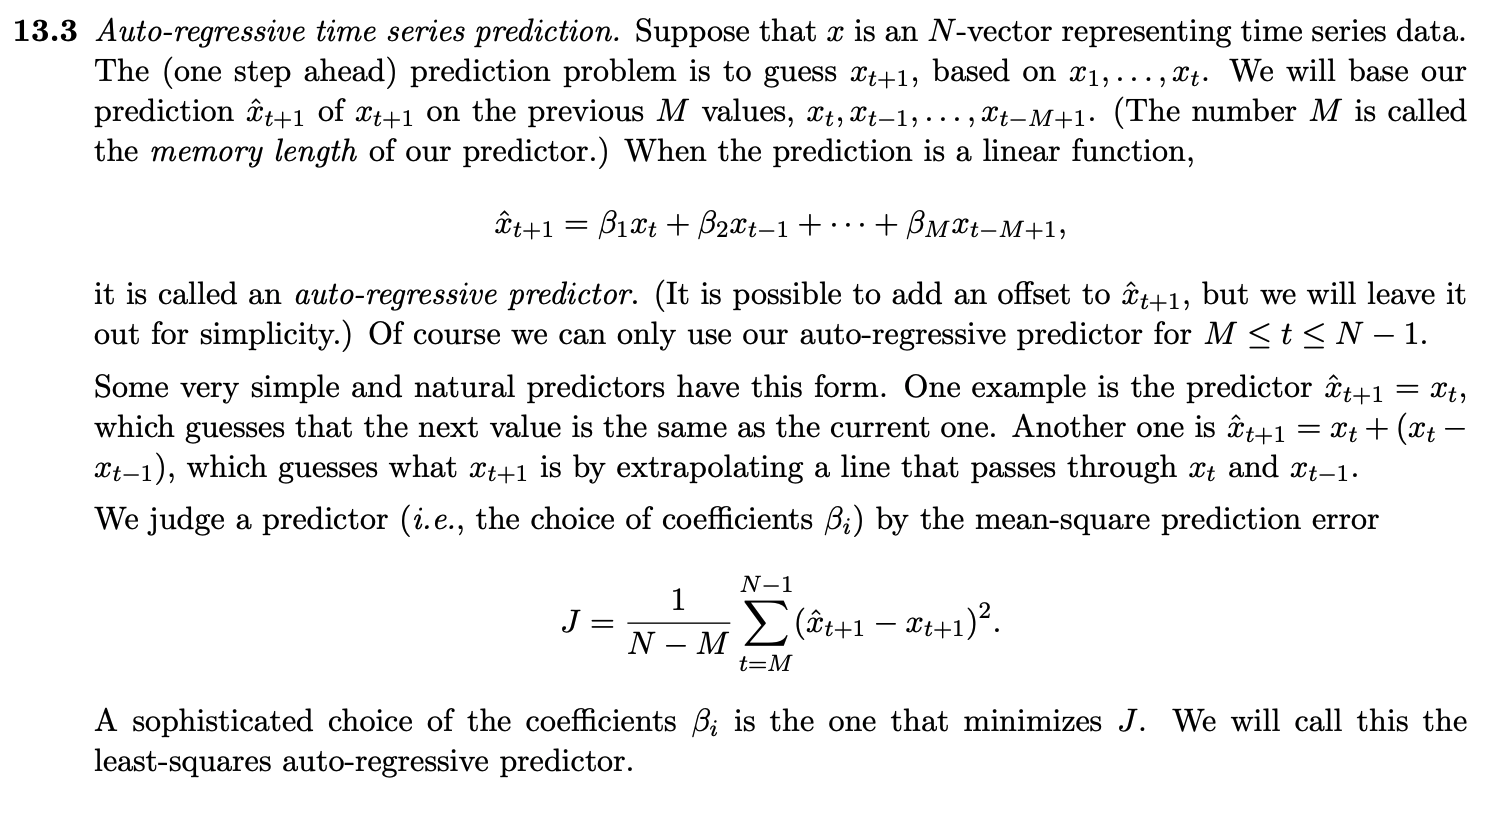

**(a)** Describe the **size** and **entries** of the matrix $A$ and the vector $b$ for which $J = \Vert A\beta - b\Vert^2 / (N-M)$.  This allows you to find the coefficients $\beta$ that minimize $J$, i.e. the auto-regressive predictor that minimizes the mean-square prediction error, simply by solving a standard least-square problem (`β = A \ b` in Julia).

**(b)** Implement an autoregressive model to predict German residential power demand with data from [this tutorial](https://vitalflux.com/autoregressive-ar-models-with-python-examples/#:~:text=Autoregressive%20models%20are%20based%20on,going%20up%20in%20the%20future.) via the code below.

* Fill in the `???` in the `autoregressive_model` to form `A, b` according to (a) for given data `x` and `M`.
* Apply it for `M=8` to find the prediction coefficients $\beta$ from "training" data consisting of the power-demand data excluding the last 100 days.
* Use the last 100 points as "test" data: compare the predictions of your fitted model by plotting the predictions for the last 100 days along with the actual data (fill in the ???).

In [1]:
# download the raw data (CSV file)
import Downloads
datafile = Downloads.download("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

"C:\\Users\\pcher\\AppData\\Local\\Temp\\jl_qB2t4NePin"

4384×5 Matrix{Any}:
 "Date"            "Consumption"     "Wind"    "Solar"     "Wind+Solar"
 "2006-01-01"  1069.18               ""        ""          ""
 "2006-01-02"  1380.52               ""        ""          ""
 "2006-01-03"  1442.53               ""        ""          ""
 "2006-01-04"  1457.22               ""        ""          ""
 "2006-01-05"  1477.13               ""        ""          ""
 "2006-01-06"  1403.43               ""        ""          ""
 "2006-01-07"  1300.29               ""        ""          ""
 "2006-01-08"  1207.98               ""        ""          ""
 "2006-01-09"  1529.32               ""        ""          ""
 "2006-01-10"  1576.91               ""        ""          ""
 "2006-01-11"  1577.18               ""        ""          ""
 "2006-01-12"  1553.28               ""        ""          ""
 ⋮                                                      
 "2017-12-20"  1559.69             90.88      8.799      99.679
 "2017-12-21"  1520.37            259.039  

summary(days) = "4383-element Vector{Int64}"
summary(consumption) = "4383-element Vector{Float64}"


[ Info: Installing matplotlib via the Conda matplotlib package...
[ Info: Running `conda install -y matplotlib` in root environment


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pcher\.julia\conda\3\x86_64

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       hcfcfb64_8          19 KB  conda-forge
    brotli-bin-1.0.9           |       hcfcfb64_8          22 KB  conda-forge
    contourpy-1.0.7            |  py310h232114e_0         158 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.38.0           |  py310h8d17308_1         1.7 MB  conda-forge
    freetype-2.12.1            |       h546665d_1         486 KB  conda-forge
    kiwisolver-1.4.4           |  py310h232114e_1          58 KB  conda-forge
    lcms2-2.14                 |       ha5c8aab_1         483 KB  conda-forge
    lerc-4.0.0                 |       h63175ca_0         190 KB 

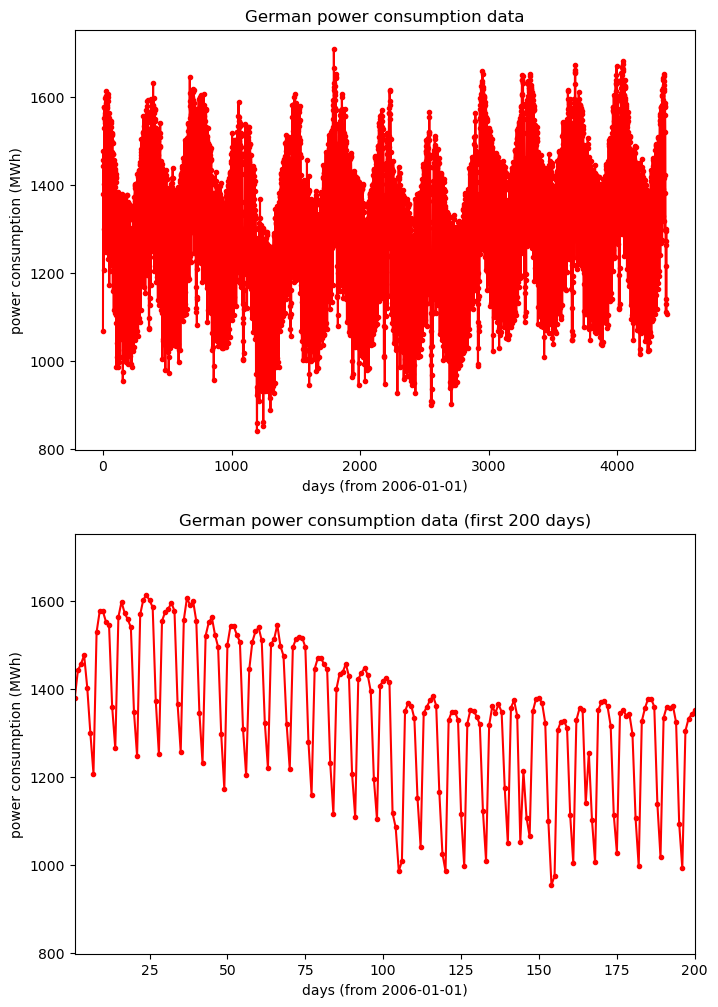

(1.0, 200.0)

In [5]:
# extract the data and plot it:

using DelimitedFiles, Dates
data = readdlm(datafile, ',')
display(data)
dates = parse.(Date, data[2:end, 1])
days = Dates.value.(dates .- dates[1])
consumption = Float64.(data[2:end, 2])
@show summary(days)
@show summary(consumption)

using PyPlot

figure(figsize=(8,12))
subplot(2,1,1)
title("German power consumption data")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")

subplot(2,1,2)
title("German power consumption data (first 200 days)")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")
xlim(1,200)

In [10]:
# fill in the ??? to get A and b from x and m
function autoregressive_model(x, M)
    N = length(x)
    A = similar(x, N-M, M) # ??? x ??? matrix of same type as x
    for i = 1:size(A,1) # fill in A row-by row
        t = M-1+i
        A[i,:] = x[t-M+1:t] # hint: each row of A comes from a slice of x
    end
    b = x[t-M+2:t+2]
    return A, b
end

training_data = consumption[1:end-100]

# construct your A and b from M=8 and find β
M = 8
A, b = autoregressive_model(training_data, M)
β = A \ b # least-square fit

LoadError: UndefVarError: t not defined

In [ ]:
# test data from last 100+M points:
test_data = consumption[end-99-M:end]

# plot the predictions for the last 100 points along with test data
predictions = A*β
plot(predictions, "ro-")
plot(test_data[end-99:end], "b*-")

## Problem 6

Show that the pseudo-inverse $A^+$ obeys $AA^+A=A$ and $A^+ A A^+ = A^+$.

## Problem 7

In this problem you will use **principal components analysis (PCA)** and the SVD to classify a images.

The code below downloads a [collection of 80 monochrome/grayscale drawings](https://math.mit.edu/~stevenj/snow.zip) of [snowpeople](https://en.wikipedia.org/wiki/Snowman) and [snowflakes](https://en.wikipedia.org/wiki/Snowflake) found by a google image search in Spring 2023, shown in miniature here:

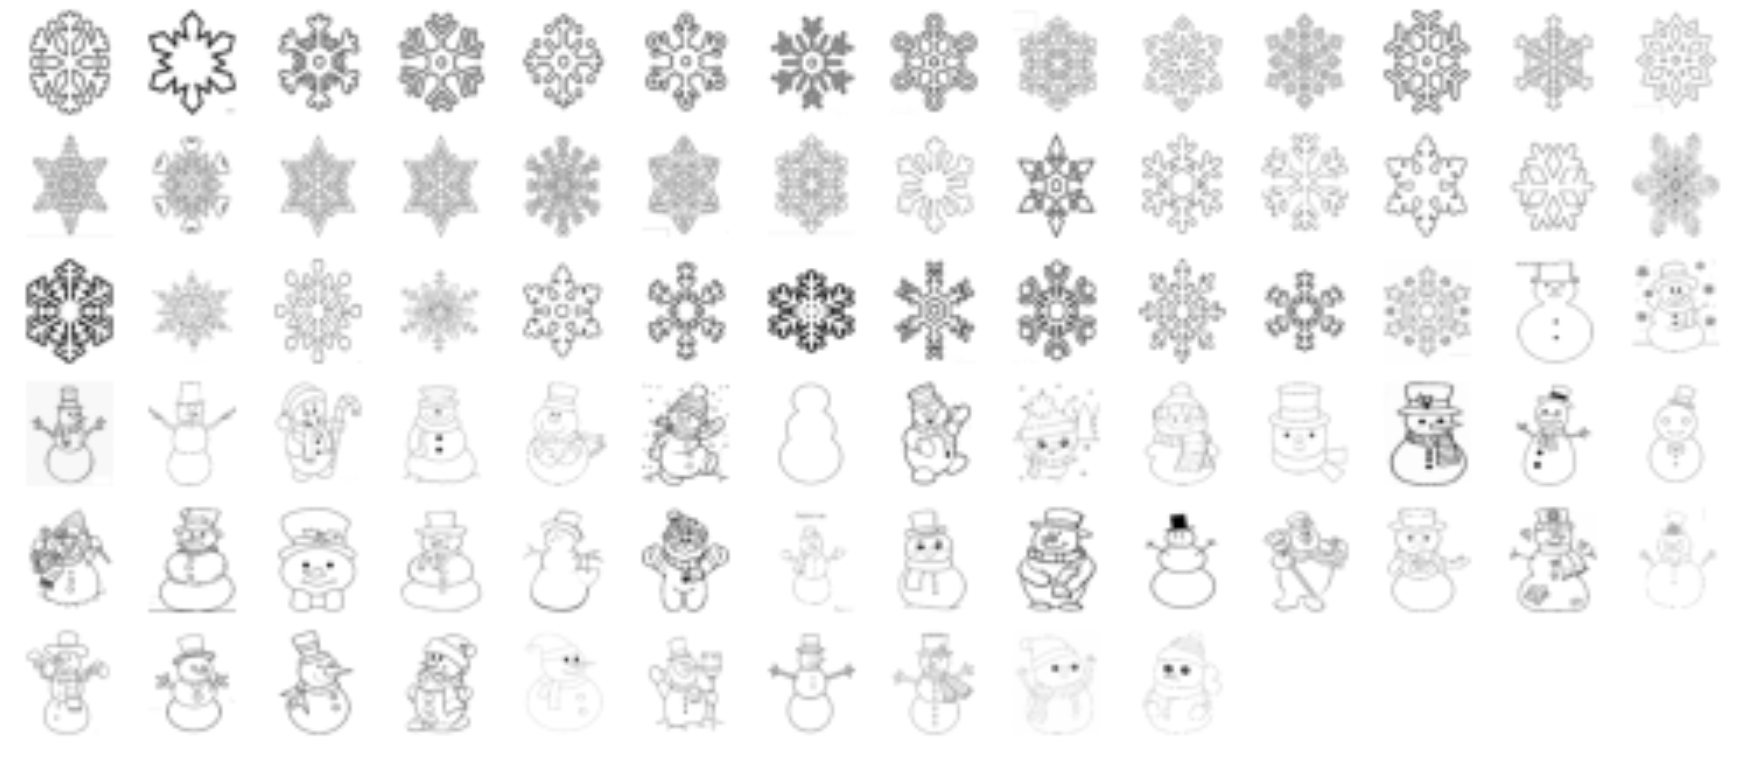

Each image is resized to a common size of $156 \times 128$, and then reshaped into a vector of $156\times 156 = 19968$ numbers (the grayscale intensity of each pixel), and stored in a matrix $X$ of "measurements" for 80 images:
$$
X = 19968 \times 80 \mbox{matrix} = \mbox{(data per image)} \times \mbox{(# images)}
$$
Think of this as 80 points in a **19968-dimensional space**, i.e. each image is a point in $\mathbb{R}^{19968}$!!

PCA allows us to figure out which combinations of these 19968 variables explain most of the variations, and allows us to *project* from $\mathbb{R}^{19968}$ to a *much* lower-dimensional space in order to help us *classify* the data and identify *clusters* of similar images.   In this problem (parts a and b, below), you will perform the PCA clustering analysis yourself.

You will need to install some Julia packages to help extract the image data.  
```jl
import Pkg
Pkg.add("ZipFile")
Pkg.add("Images")
Pkg.add("FileIO")
```
(or type `] add ZipFile Images FileIO`).

You can then run the following code to download the data and reshape it into our $X$ matrix:

In [7]:
using ZipFile, Images, FileIO, Statistics, LinearAlgebra, PyPlot

# download the files as a zip archive:
imagezip = download("https://math.mit.edu/~stevenj/snow.zip")

"C:\\Users\\pcher\\AppData\\Local\\Temp\\jl_GjIFMzCBg9"

In [8]:
rows, cols = 156,128  # common size to resize all of the images to

# extract the images from the zip file, load them, resize them, and stick them into a big array Xdata
Xdata = Float64[]
r = ZipFile.Reader(imagezip)
for f in r.files
    # load image and rescale to rows x cols
    image = imresize(load(IOBuffer(read(f))), rows, cols)
    imagedata = Float64.(channelview(image))
    if length(imagedata) == rows*cols # grayscale
        # convert to RGB
        bw = vec(imagedata)
        imagedata = permutedims([bw bw bw])
    elseif size(imagedata, 1) == 4 # RGBA
        α = reshape(imagedata[4, :, :], 1, rows, cols) # alpha (transparency)
        # convert to RGB, with transparent pixels converted to white:
        imagedata = imagedata[1:3, :, :] .* α .+ (1 .- α)
    end
    # convert back to grayscale (average RGB channels) and collect in Xdata
    append!(Xdata, reshape(mean(imagedata, dims=1), rows, cols))
end

# array of file names, and indices of snowflakes vs snowpeople
names = [f.name for f in r.files]
snowperson_indices = findall(startswith("s"), names)
snowflake_indices = findall(startswith("f"), names)

# reshape into 19968x80 matrix X
X = reshape(Xdata, :, length(r.files)) # reshape to (imagesize) x (numimages) matrix
@show size(X)

# a useful function to reshape a vector into a BW image and plot it
function plotimg(imgdata, rows=rows, cols=cols)
    u = copy(imgdata)
    u .-= minimum(u)
    u ./= maximum(u)
    imshow(reshape(u, rows, cols), cmap="gray")
    axis("off")
end

size(X) = (19968, 80)


plotimg (generic function with 3 methods)

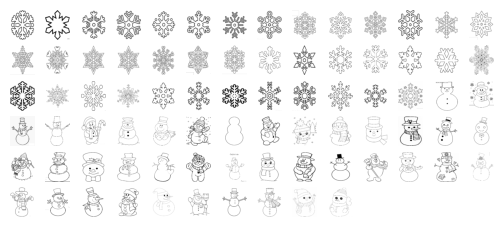

In [9]:
# first, let's plot all of the images to make sure they look okay:
figure(figsize=(6.3, 3.15))
r, c = 7, 14
for i = 1:r, j=1:c
    k = (i-1)*c + j
    k > size(X,2) && break
    subplot(r, c, k)
    plotimg(X[:,k])
end

**(a)** Fill in the code below to compute the matrix `A` with the *mean of each pixel* (over all images) subtracted, and take its SVD to plot the singular values.

(Be careful: some treatments of PCA put the different samples in the rows of $X$ and $A$, and some put the samples in the columns.  Which are we doing here?)

In [ ]:
A = x - mean(x)

U, σ, V = svd(A);

plot(σ, "b.-")
title("Problem 7(a): Singular values of A");
xlabel(L"k");
legend([L"\sigma_k"]);

**(b)** Compute the projections `c1[i]` and `c2[i]` of each image
onto the dominant two principal components (vectors u or v in this case?).  That is, reduce the 19968-dimensional data to **2 dimensions**.

(Does it matter much whether you do the projection to the images in $A$ or $X$?  Why or why not?)

Run the code below to plot `c2` vs `c1` for every image, coloring the points corresponding to snowpeople blue and the points corresponding to snowflakes red.  Hopefully, in this 2d projection, you will see
different types of images separated into mostly distinct coordinate regions, with similar images clustered together.

In [ ]:
c1 = ???
c2 = ???

In [ ]:
figure(figsize=(20,15))
plot(c1[snowperson_indices], c2[snowperson_indices], "b.")
plot(c1[snowflake_indices], c2[snowflake_indices], "r.")
text.(c1, c2, string.(1:length(c1)), fontsize=12);

title("Problem 7(b): Compressed data, visualized on a plane", fontsize=20);
xlabel(L"$c_1$", fontsize=20);
ylabel(L"$c_2$", fontsize=20);